In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pathlib

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

from IPython.display import Image

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [0]:
# clonar repositorio 
! git clone https://github.com/fabrilopez/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [0]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
label_names={'aca_315': 0, 'buck_guapo': 1, 'buck_meteoro': 2, 'klein_escorpion': 3}

In [0]:
# loading trained model
model = tf.keras.models.load_model('datasets/H5/vgg16_07_model.h5')

In [0]:
# function that takes a photo to make the prediction
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


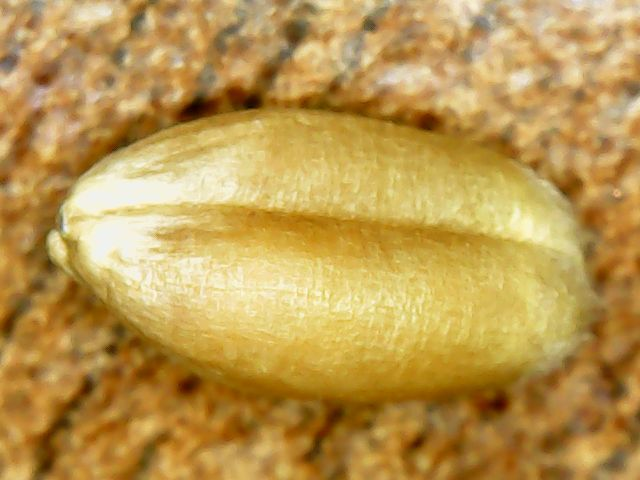

In [0]:
# take photo
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

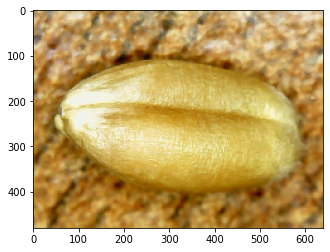

In [0]:
# make a prediction
image_name = 'photo.jpg'
image = tf.io.read_file(image_name)
image = tf.image.decode_jpeg(image, channels=3)
plt.imshow(image)
image = tf.cast(image, tf.float32)
image = (image/127.5) - 1
image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
image4d = tf.expand_dims(image,0)
prediction = model.predict(image4d)

In [0]:
print(prediction)

[[0.89666635 0.01082153 0.09133026 0.00118182]]


In [0]:
np_key = np.argmax(prediction)
for label, key in label_names.items():
  if key == np_key:
    print('La semilla seleccionada pertenece a la variedad: ' + label)

La semilla seleccionada pertenece a la variedad: aca_315
